In [1]:
from utils.log_visualizer import *

In [2]:
path = "./data/logs/"

stage1_path = "./data/logs/stage1_logs_k_128/"

In [3]:
# Find all files in the logs directory beginning with "log"
import os

files = os.listdir(path)
stage1_files = os.listdir(stage1_path)

stage2 = [f for f in files if "stage2.txt" in f]

## Stage 1

In [4]:
stage1_files = [stage1_path + f for f in stage1_files]
stage1_files.sort()

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_16_lr_1e-4_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


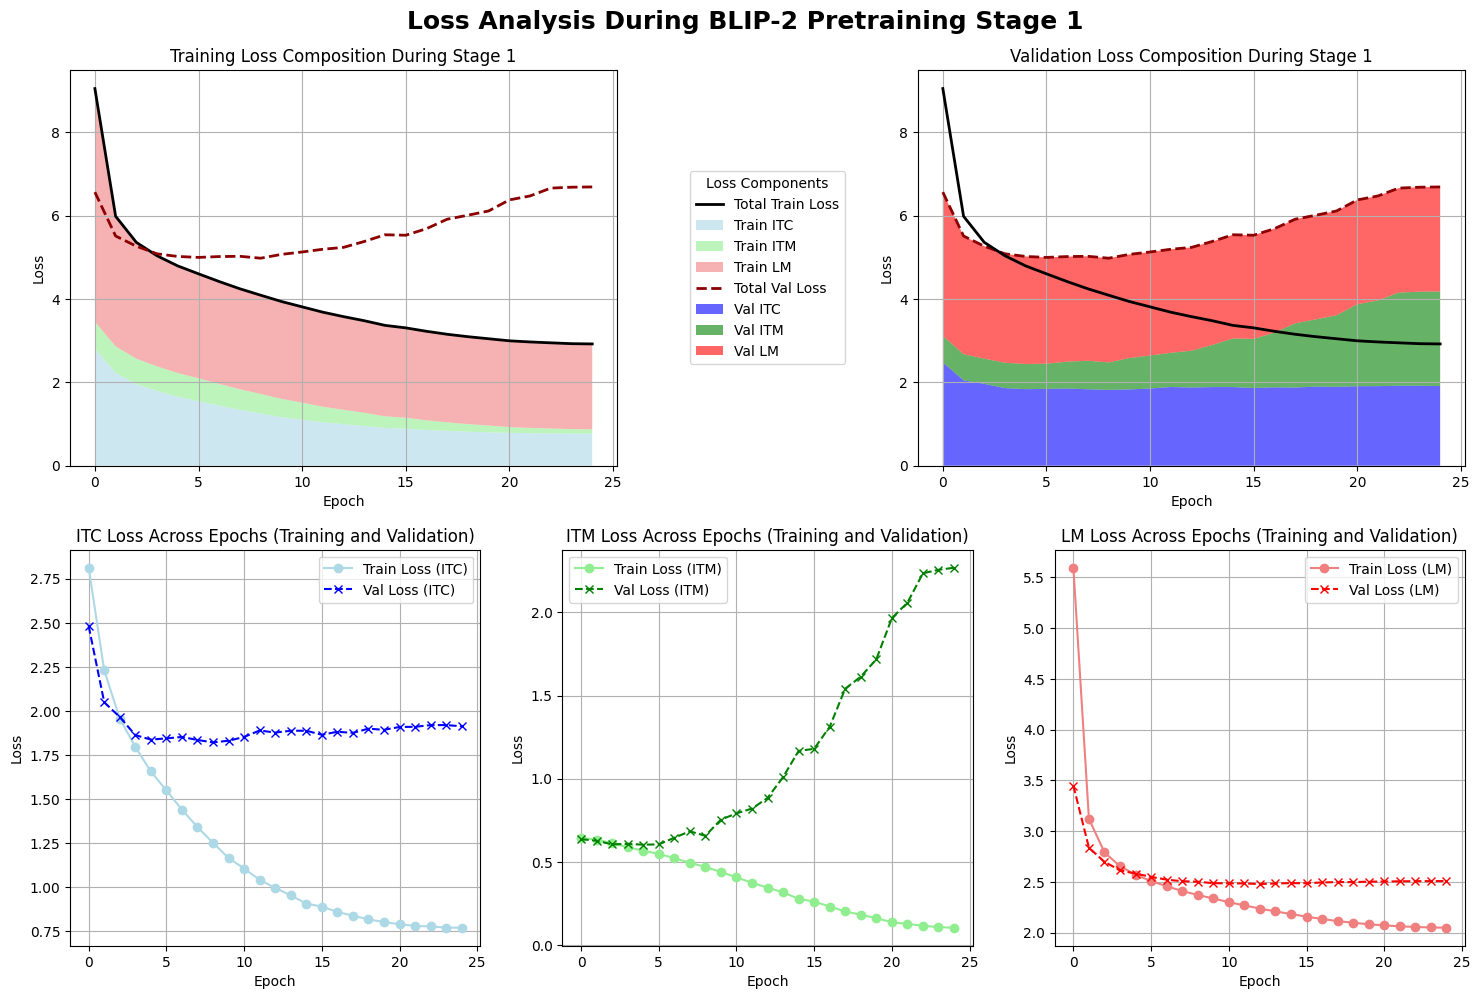

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_16_lr_1e-5_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


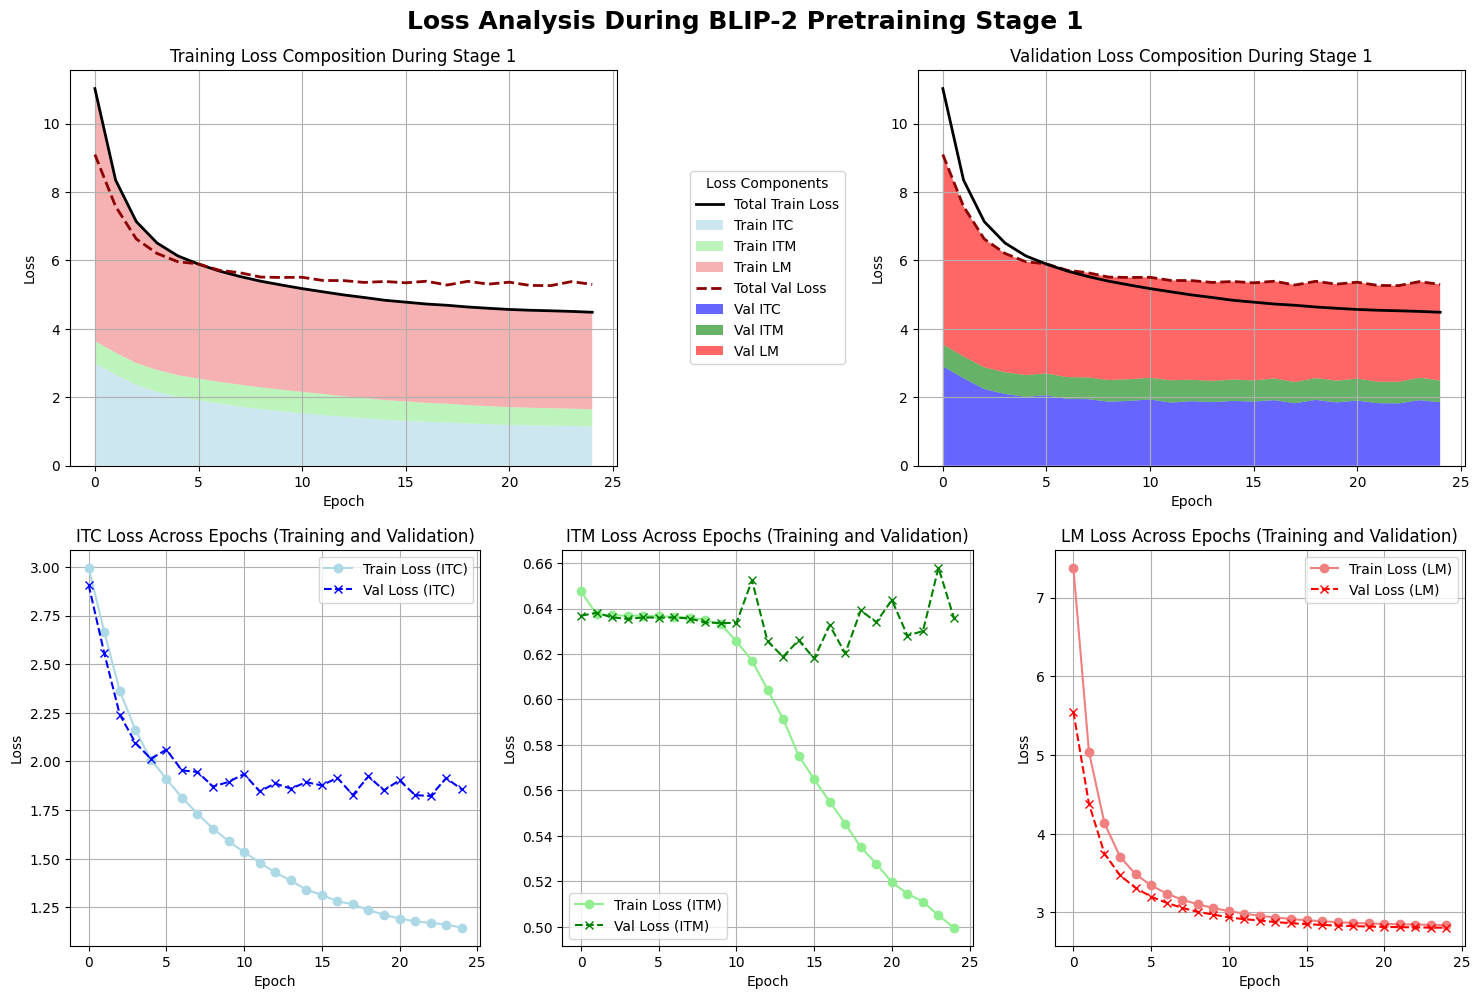

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_16_lr_5e-5_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


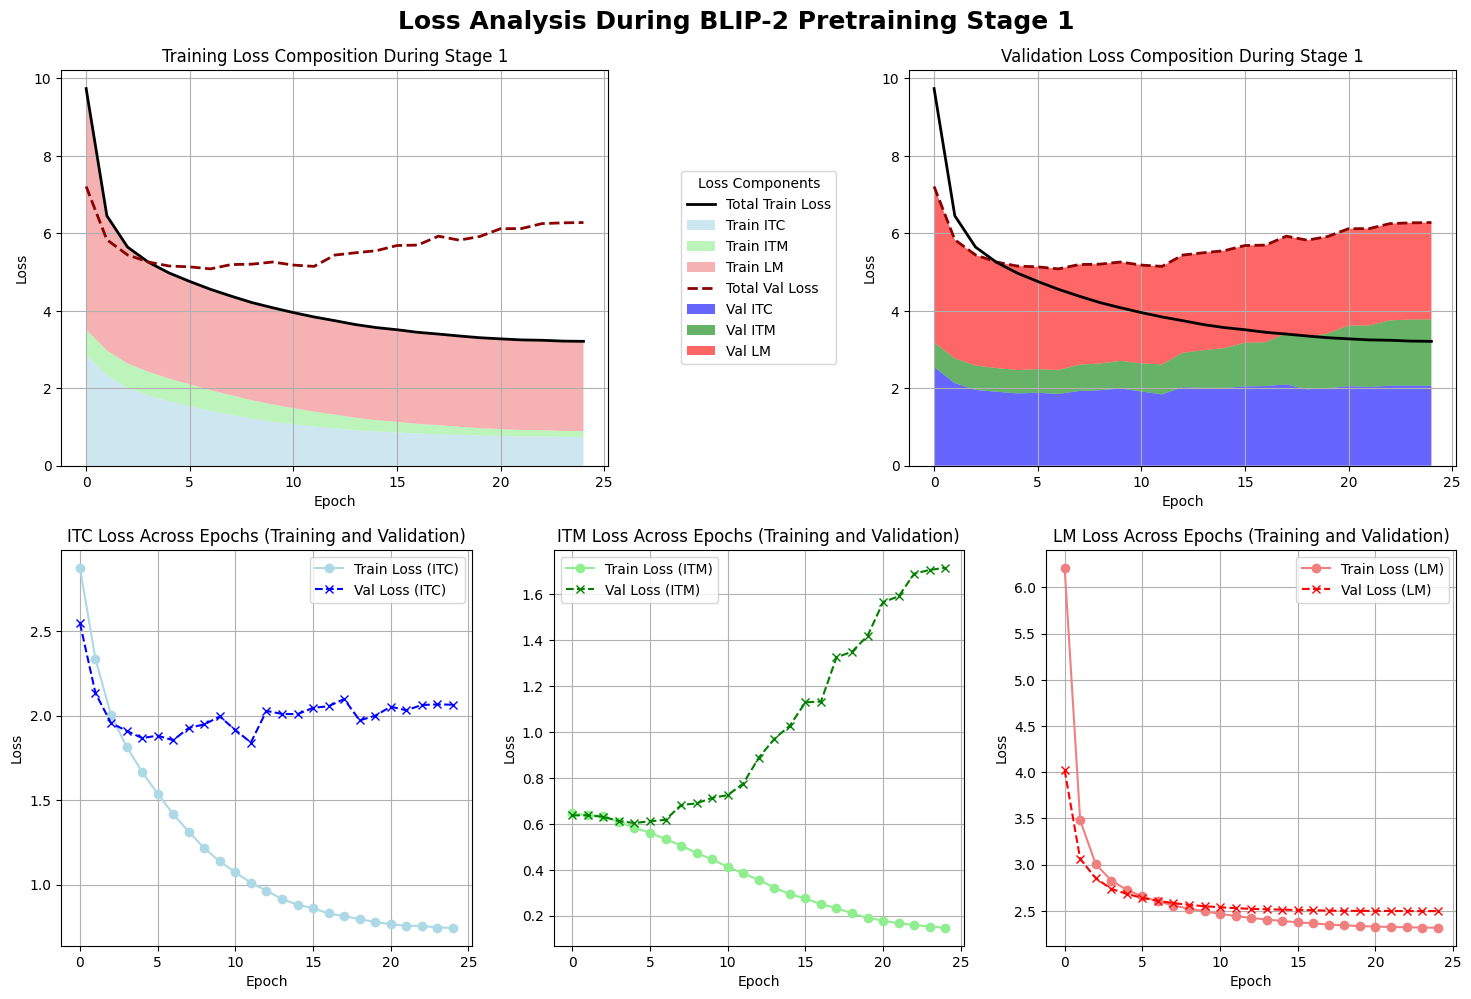

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_32_lr_1e-4_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_32_lr_1e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_32_lr_5e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_64_lr_1e-4_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_64_lr_1e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_false_query_64_lr_5e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_16_lr_1e-4_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


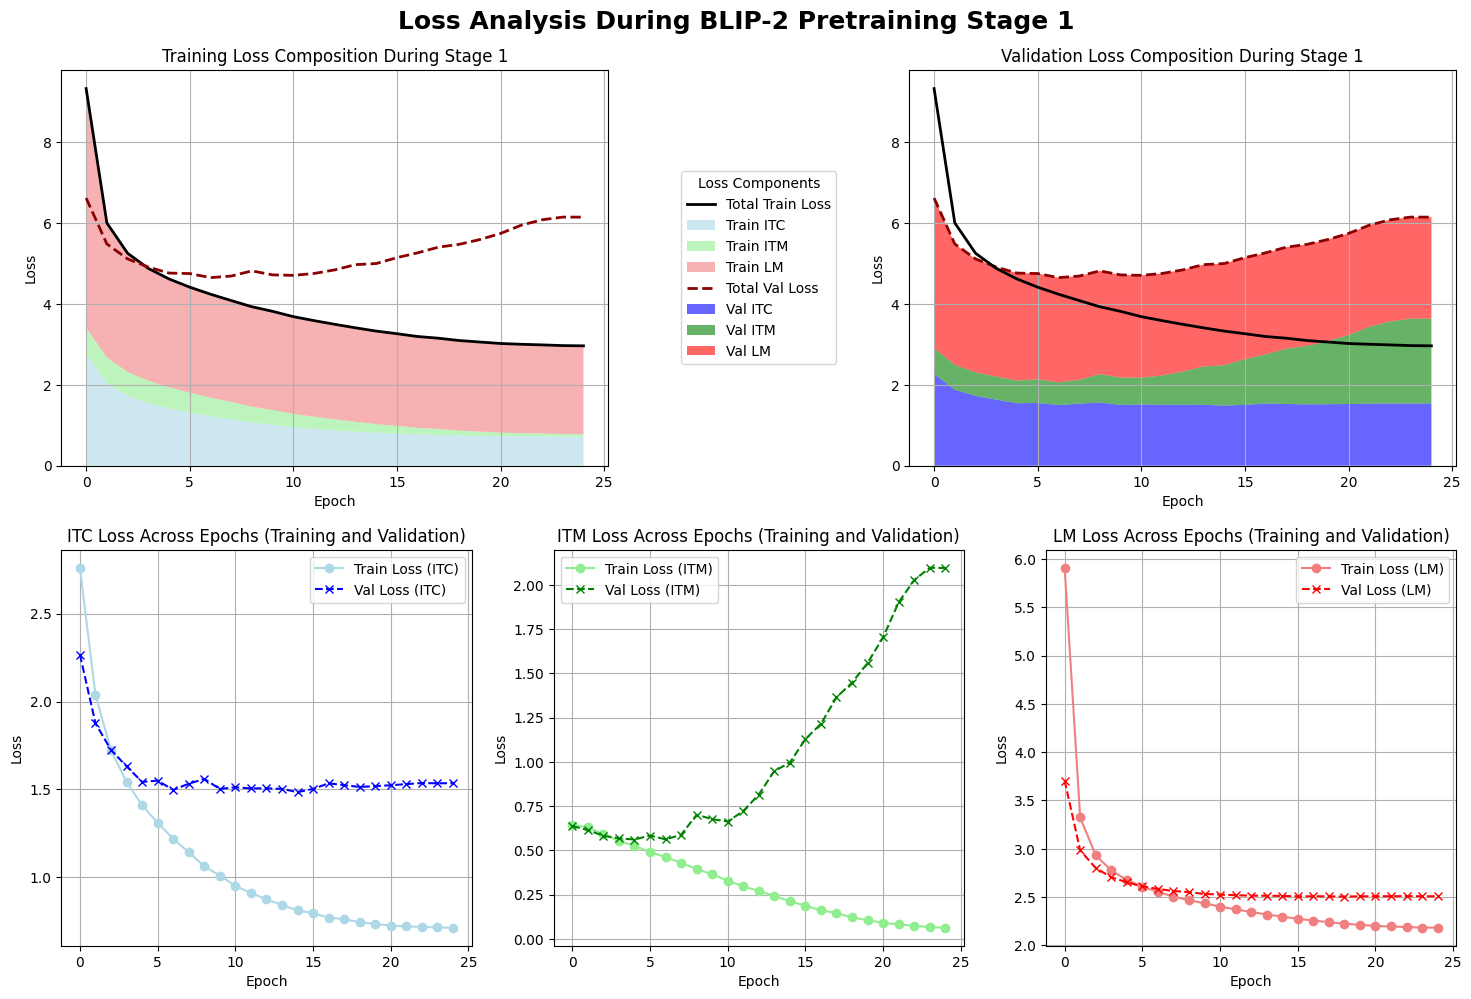

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_16_lr_1e-5_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


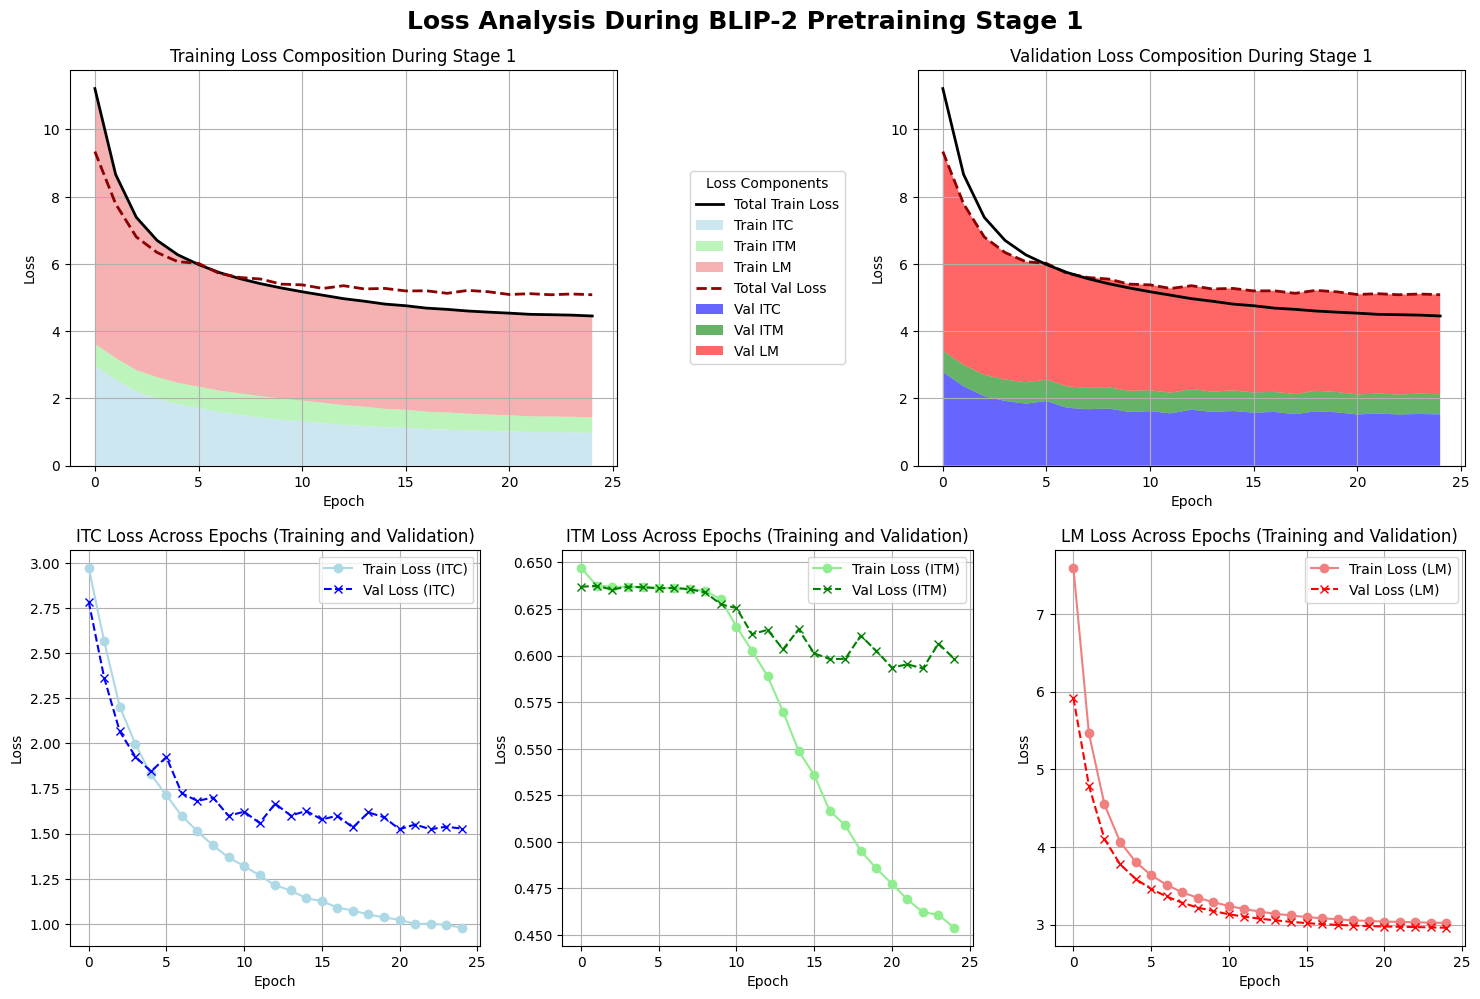

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_16_lr_5e-5_epoch_25_k_128.txt


/home/tvandeluijtgaarden/repositories/PathBLIP2/projects/pathology/utils/log_visualizer.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle


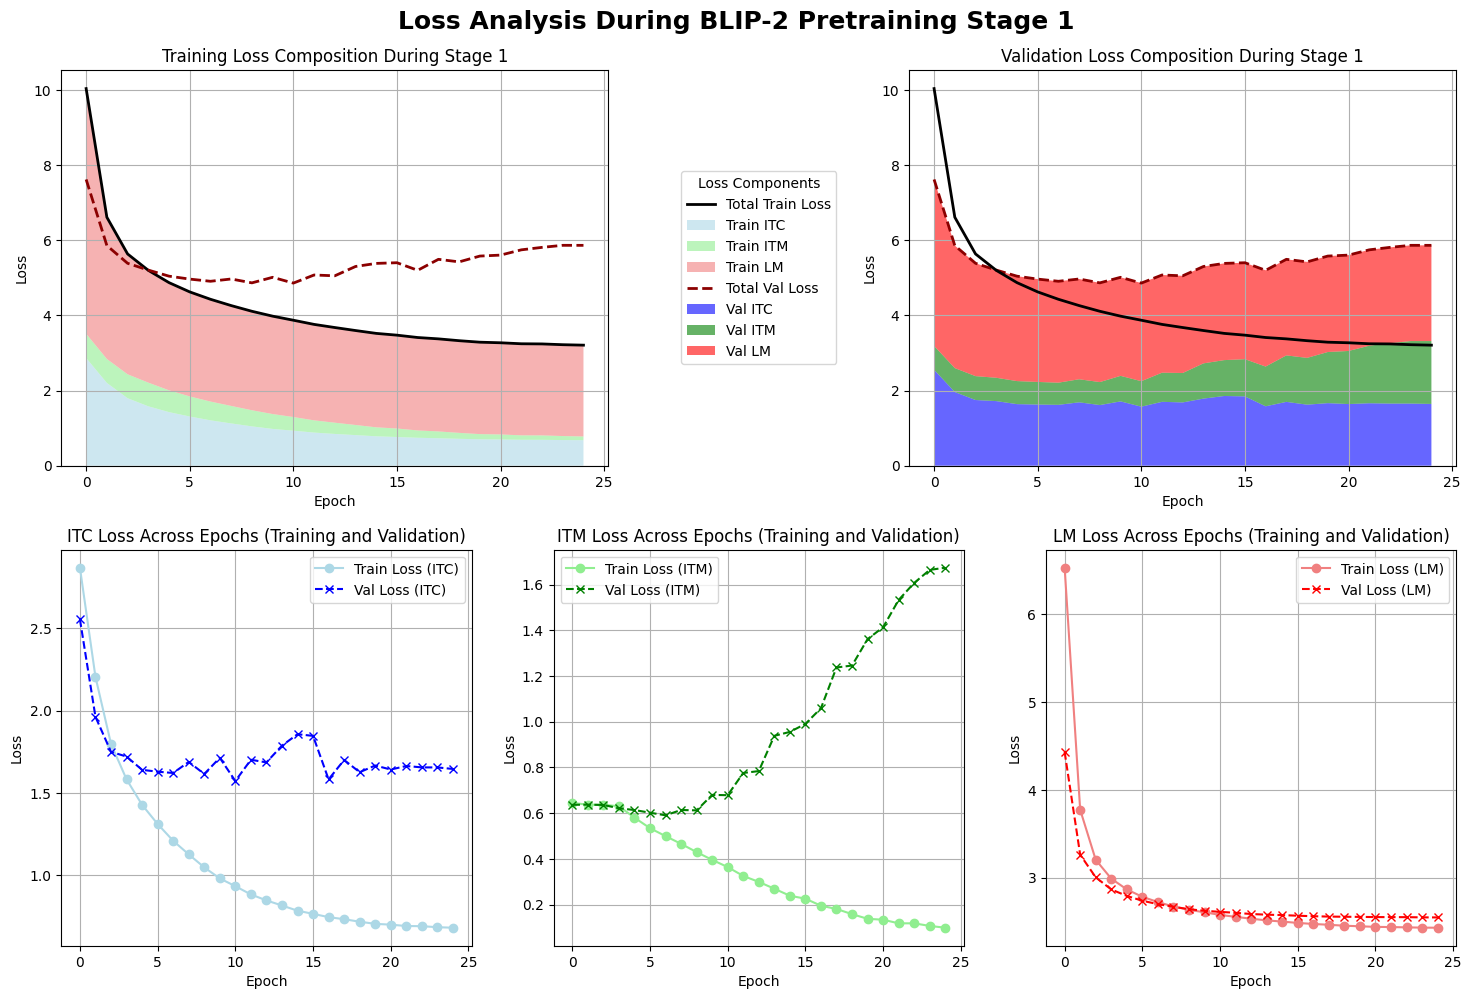

Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_32_lr_1e-4_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_32_lr_1e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_32_lr_5e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_64_lr_1e-4_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_64_lr_1e-5_epoch_25_k_128.txt
Plots for log file: ./data/logs/stage1_logs_k_128/log_Pretrain_stage1_allinfo_true_query_64_lr_5e-5_epoch_25_k_128.txt


In [5]:
comparison = pd.DataFrame()

for stage1_run in stage1_files:
    # try:
    #     weight_itc = stage1_run.split('_')[1] 
    #     weight_itm = stage1_run.split('_')[2] 
    #     weight_lm = stage1_run.split('_')[3]
    # except:
    #     weight_itc = 1
    #     weight_itm = 1
    #     weight_lm = 1
    stage1_log = read_log_file(stage1_run)
    print(f'Plots for log file: {stage1_run}')
    run, model, datasets, train_val_lst, test_score = split_log_file_stage1(stage1_log)
    best_epoch = train_val_lst[-1]['val_best_epoch']
    df, test = weighted_score_adjustment(1, 1, 1, train_val_lst, test_score)
    parameters= {"all_info": stage1_run.split("_")[7],
        "num_query_token": stage1_run.split("_")[9],
        "lr" : stage1_run.split("_")[11],
        "epochs": stage1_run.split("_")[13],
        "k": stage1_run.split("_")[15].rstrip('.txt'),
        "best_epoch": best_epoch}
    if parameters["k"] != "N":
        test_score = {b[0]: b[1] for b in test_score.items() if "mean" not in b[0]}
        test_score = {b[0]: b[1] for b in test_score.items() if "median" not in b[0]}
    
    if parameters['num_query_token'] == '16':
        create_2x3_plot_stage1(df)

    # If key contains '_txt' then replace it to _img2txt
    # if key contains '_img' then replace it to _txt2img
    keys = list(test_score.keys())
    for key in keys:
        if "_txt" in key:
            test_score[key.replace("_txt", "_img2txt")] = test_score.pop(key)
        if "_img" in key:
            test_score[key.replace("_img", "_txt2img")] = test_score.pop(key)

    test_score = {**test_score, **parameters}

    if parameters["all_info"] == "false":
        keys = list(test_score.keys())
        for key in keys:
            if "_r" in key:
                if "_other" in key:
                    test_score[key.replace("_other", "_ALL")] = test_score.pop(key)
                    continue
                # add "_H&E to the key"
                test_score[key + "_H&E"] = test_score.pop(key)
    else:
        keys = list(test_score.keys())
        for key in keys:
            if "_r" in key:
                if "_other" in key:
                    test_score[key.replace("_other", "_H&E")] = test_score.pop(key)
                    continue
                # add "_H&E to the key"
                test_score[key + "_ALL"] = test_score.pop(key)


    comparison = pd.concat([comparison, pd.DataFrame(test_score.values(), test_score.keys()).T])

In [6]:
pd.set_option('display.max_columns', None)
comparison.columns = [col.replace("test_", "") for col in comparison.columns]
comparison['lr'] = comparison['lr'].astype(float)
comparison = comparison[comparison['lr'] == 0.0001]
test_results_stage1 = comparison.set_index(["all_info", "num_query_token", "lr"]).sort_values(by=["all_info", "num_query_token", "lr"])
new_columns = test_results_stage1.columns[:7].tolist() 

for x, y in zip(test_results_stage1.columns[7:17], test_results_stage1.columns[17:]):
    new_columns += [x, y]

test_results_stage1 = test_results_stage1[new_columns]
test_results_stage1

# test_results_stage1.to_excel("./data/stage1_results.xlsx")

agg_metrics eval_loss_itc eval_loss_itm  \
all_info num_query_token lr                                               
false    16              0.0001    4.984512      1.805233      0.650226   
         32              0.0001    5.166733      1.970972      0.670758   
         64              0.0001    5.072659      1.900976      0.623566   
true     16              0.0001    4.695093      1.517485      0.565716   
         32              0.0001    4.741003      1.573823      0.556618   
         64              0.0001    5.155065      2.032757      0.451652   

                                eval_loss_lm epochs    k best_epoch  \
all_info num_query_token lr                                           
false    16              0.0001     2.529053     25  128          8   
         32              0.0001     2.525003     25  128          7   
         64              0.0001     2.548117     25  128          6   
true     16              0.0001     2.611892     25  128          6   
         32              0.0001     2.610562     25  128          6   
         64              0.0001     2.670656     25  128          4   

                                img2txt_r1_H&E img2txt_r1_ALL img2txt_r5_H&E  \
all_info num_query_token lr                                                    
false    16              0.0001       2.233503        2.48731      10.456853   
         32              0.0001       2.385787       2.335025       9.238579   
         64              0.0001        2.48731       2.284264        9.64467   
true     16              0.0001       1.827411       5.837563       8.071066   
         32              0.0001       1.370558       5.532995       6.192893   
         64              0.0001       1.116751       3.654822       6.395939   

                                img2txt_r5_ALL img2txt_r10_H&E  \
all_info num_query_token lr                                      
false    16              0.0001       9.390863       17.461929   
         32              0.0001       8.324873       16.192893   
         64              0.0001       9.593909       15.634518   
true     16              0.0001      18.274112       13.147208   
         32              0.0001      15.989848       11.370558   
         64              0.0001      12.335025       10.507614   

                                img2txt_r10_ALL img2txt_r25_H&E  \
all_info num_query_token lr                                       
false    16              0.0001       16.395939       31.675127   
         32              0.0001       14.467005       28.984772   
         64              0.0001       14.720812        28.93401   
true     16              0.0001       27.969543       25.634518   
         32              0.0001       25.786802       23.756345   
         64              0.0001       21.319797        21.06599   

                                img2txt_r25_ALL img2txt_r100_H&E  \
all_info num_query_token lr                                        
false    16              0.0001       29.543147        64.263959   
         32              0.0001       25.989848        60.304569   
         64              0.0001       28.274112         60.71066   
true     16              0.0001       45.380711        56.598985   
         32              0.0001       43.857868        53.350254   
         64              0.0001       37.461929        45.126904   

                                img2txt_r100_ALL txt2img_r1_H&E  \
all_info num_query_token lr                                       
false    16              0.0001        63.299492       2.690355   
         32              0.0001        55.888325       2.538071   
         64              0.0001         60.35533       2.994924   
true     16              0.0001        76.395939        1.42132   
         32              0.0001        75.888325       1.725888   
         64              0.0001        63.807107       1.269036   

                                txt2img_r1_ALL txt2img_r5_H&E txt2img_r5_

In [7]:
paper_df = test_results_stage1.reset_index()
paper_df['all_info'] = paper_df['all_info'].map({'true': 'Full report', 'false': 'H&E-curated report'})
paper_df.drop(columns=['lr', 'epochs', 'k'], inplace=True)
paper_df

,all_info,num_query_token,agg_metrics,eval_loss_itc,eval_loss_itm,eval_loss_lm,best_epoch,img2txt_r1_H&E,img2txt_r1_ALL,img2txt_r5_H&E,img2txt_r5_ALL,img2txt_r10_H&E,img2txt_r10_ALL,img2txt_r25_H&E,img2txt_r25_ALL,img2txt_r100_H&E,img2txt_r100_ALL,txt2img_r1_H&E,txt2img_r1_ALL,txt2img_r5_H&E,txt2img_r5_ALL,txt2img_r10_H&E,txt2img_r10_ALL,txt2img_r25_H&E,txt2img_r25_ALL,txt2img_r100_H&E,txt2img_r100_ALL
0,H&E-curated report,16,4.984512,1.805233,0.650226,2.529053,8,2.233503,2.48731,10.456853,9.390863,17.461929,16.395939,31.675127,29.543147,64.263959,63.299492,2.690355,2.385787,10.406091,8.984772,16.852792,15.431472,31.725888,29.949239,61.979695,62.13198
1,H&E-curated report,32,5.166733,1.970972,0.670758,2.525003,7,2.385787,2.335025,9.238579,8.324873,16.192893,14.467005,28.984772,25.989848,60.304569,55.888325,2.538071,2.284264,10.203046,7.918782,16.345178,13.19797,29.340102,25.837563,61.218274,55.431472
2,H&E-curated report,64,5.072659,1.900976,0.623566,2.548117,6,2.48731,2.284264,9.64467,9.593909,15.634518,14.720812,28.93401,28.274112,60.71066,60.35533,2.994924,2.436548,10.507614,9.441624,16.243655,15.786802,29.593909,29.898477,60.913706,60.812183
3,Full report,16,4.695093,1.517485,0.565716,2.611892,6,1.827411,5.837563,8.071066,18.274112,13.147208,27.969543,25.634518,45.380711,56.598985,76.395939,1.42132,5.736041,6.446701,17.208122,11.370558,27.055838,21.725888,45.177665,51.624365,75.837563
4,Full report,32,4.741003,1.573823,0.556618,2.610562,6,1.370558,5.532995,6.192893,15.989848,11.370558,25.786802,23.756345,43.857868,53.350254,75.888325,1.725888,4.213198,5.583756,16.649746,9.593909,26.700508,20.761421,44.822335,49.086294,74.670051
5,Full report,64,5.155065,2.032757,0.451652,2.670656,4,1.116751,3.654822,6.395939,12.335025,10.507614,21.319797,21.06599,37.461929,45.126904,63.807107,1.269036,3.299492,5.228426,11.624365,8.832487,18.781726,16.294416,34.060914,39.137056,61.116751


In [8]:
# --- DataFrame Preparation ---
paper_df = test_results_stage1.reset_index()

# Map the 'all_info' column to desired training labels
paper_df['all_info'] = paper_df['all_info'].map({'true': 'Full report', 'false': 'H&E-curated report'})
paper_df.drop(columns=['lr', 'epochs', 'k'], inplace=True)

# Create a 'training' column where we treat "H&E-curated report" as "H&E only"
paper_df['training'] = paper_df['all_info'].replace({'H&E-curated report': 'H&E only'})

# --- Create DataFrames for Different Retrieval Sources ---
# DataFrame for retrieval using H&E-only scores:
df_he = paper_df[['training', 'num_query_token', 'best_epoch', 'agg_metrics',
                    'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                    'img2txt_r1_H&E', 'img2txt_r5_H&E', 'img2txt_r10_H&E']].copy()
df_he['retrieved'] = 'H&E only'
df_he.rename(columns={
    'img2txt_r1_H&E': 'R@1',
    'img2txt_r5_H&E': 'R@5',
    'img2txt_r10_H&E': 'R@10'
}, inplace=True)

# DataFrame for retrieval using Full report scores:
df_full = paper_df[['training', 'num_query_token', 'best_epoch', 'agg_metrics',
                      'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                      'img2txt_r1_ALL', 'img2txt_r5_ALL', 'img2txt_r10_ALL']].copy()
df_full['retrieved'] = 'Full report'
df_full.rename(columns={
    'img2txt_r1_ALL': 'R@1',
    'img2txt_r5_ALL': 'R@5',
    'img2txt_r10_ALL': 'R@10'
}, inplace=True)

# --- Combine and Order the Data ---
result_df_i2t = pd.concat([df_he, df_full], ignore_index=True)
result_df_i2t = result_df_i2t[['num_query_token', 'training', 'retrieved', 'best_epoch', 'agg_metrics',
                       'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                       'R@1', 'R@5', 'R@10']]

# --- Rounding the Values ---
# Round loss scores to 3 decimals
loss_cols = ['agg_metrics', 'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm']
result_df_i2t[loss_cols] = result_df_i2t[loss_cols].astype(float).round(3)

# Round recall scores to 1 decimal
recall_cols = ['R@1', 'R@5', 'R@10']
result_df_i2t[recall_cols] = result_df_i2t[recall_cols].astype(float).round(1)

# result_df = result_df.groupby(['num_query_token', 'training', 'retrieved']).mean()
# result_df['best_epoch'] = result_df['best_epoch'].astype(int)

result_df_i2t.sort_values(by=['num_query_token', 'training', 'retrieved'], inplace=True)

In [9]:
result_df_i2t

,num_query_token,training,retrieved,best_epoch,agg_metrics,eval_loss_itc,eval_loss_itm,eval_loss_lm,R@1,R@5,R@10
9,16,Full report,Full report,6,4.695,1.517,0.566,2.612,5.8,18.3,28.0
3,16,Full report,H&E only,6,4.695,1.517,0.566,2.612,1.8,8.1,13.1
6,16,H&E only,Full report,8,4.985,1.805,0.650,2.529,2.5,9.4,16.4
0,16,H&E only,H&E only,8,4.985,1.805,0.650,2.529,2.2,10.5,17.5
10,32,Full report,Full report,6,4.741,1.574,0.557,2.611,5.5,16.0,25.8
4,32,Full report,H&E only,6,4.741,1.574,0.557,2.611,1.4,6.2,11.4
7,32,H&E only,Full report,7,5.167,1.971,0.671,2.525,2.3,8.3,14.5
1,32,H&E only,H&E only,7,5.167,1.971,0.671,2.525,2.4,9.2,16.2
11,64,Full report,Full report,4,5.155,2.033,0.452,2.671,3.7,12.3,21.3
5,64,Full report,H&E only,4,5.155,2.033,0.452,2.671,1.1,6.4,10.5


In [10]:
# --- Generate LaTeX Code ---
latex_table = result_df_i2t.to_latex(
    escape=False,
    caption=("Results for text-to-image matching based on the cases in the independent test set ($N$~=~1,970). "
             "Note that lower scores represent better performance for the rank."),
    label="Tab:I2T",
    column_format='@{}cccccccccc@{}',
    header=True
)
print(latex_table)

\begin{table}
\caption{Results for text-to-image matching based on the cases in the independent test set ($N$~=~1,970). Note that lower scores represent better performance for the rank.}
\label{Tab:I2T}
\begin{tabular}{@{}cccccccccc@{}}
\toprule
 & num_query_token & training & retrieved & best_epoch & agg_metrics & eval_loss_itc & eval_loss_itm & eval_loss_lm & R@1 & R@5 & R@10 \\
\midrule
9 & 16 & Full report & Full report & 6 & 4.695000 & 1.517000 & 0.566000 & 2.612000 & 5.800000 & 18.300000 & 28.000000 \\
3 & 16 & Full report & H&E only & 6 & 4.695000 & 1.517000 & 0.566000 & 2.612000 & 1.800000 & 8.100000 & 13.100000 \\
6 & 16 & H&E only & Full report & 8 & 4.985000 & 1.805000 & 0.650000 & 2.529000 & 2.500000 & 9.400000 & 16.400000 \\
0 & 16 & H&E only & H&E only & 8 & 4.985000 & 1.805000 & 0.650000 & 2.529000 & 2.200000 & 10.500000 & 17.500000 \\
10 & 32 & Full report & Full report & 6 & 4.741000 & 1.574000 & 0.557000 & 2.611000 & 5.500000 & 16.000000 & 25.800000 \\
4 & 32 & Full r

In [11]:
# --- DataFrame Preparation ---
paper_df = test_results_stage1.reset_index()

# Map the 'all_info' column to desired training labels
paper_df['all_info'] = paper_df['all_info'].map({'true': 'Full report', 'false': 'H&E-curated report'})
paper_df.drop(columns=['lr', 'epochs', 'k'], inplace=True)

# Create a 'training' column where we treat "H&E-curated report" as "H&E only"
paper_df['training'] = paper_df['all_info'].replace({'H&E-curated report': 'H&E only'})

# --- Create DataFrames for Different Retrieval Sources ---
# DataFrame for retrieval using H&E-only scores:
df_he = paper_df[['training', 'num_query_token', 'best_epoch', 'agg_metrics',
                    'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                    'txt2img_r1_H&E', 'txt2img_r5_H&E', 'txt2img_r10_H&E']].copy()
df_he['retrieved'] = 'H&E only'
df_he.rename(columns={
    'txt2img_r1_H&E': 'R@1',
    'txt2img_r5_H&E': 'R@5',
    'txt2img_r10_H&E': 'R@10'
}, inplace=True)

# DataFrame for retrieval using Full report scores:
df_full = paper_df[['training', 'num_query_token', 'best_epoch', 'agg_metrics',
                      'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                      'txt2img_r1_ALL', 'txt2img_r5_ALL', 'txt2img_r10_ALL']].copy()
df_full['retrieved'] = 'Full report'
df_full.rename(columns={
    'txt2img_r1_ALL': 'R@1',
    'txt2img_r5_ALL': 'R@5',
    'txt2img_r10_ALL': 'R@10'
}, inplace=True)

# --- Combine and Order the Data ---
result_df_t2i = pd.concat([df_he, df_full], ignore_index=True)
result_df_t2i = result_df_t2i[['num_query_token', 'training', 'retrieved', 'best_epoch', 'agg_metrics',
                       'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm',
                       'R@1', 'R@5', 'R@10']]

# --- Rounding the Values ---
# Round loss scores to 3 decimals
loss_cols = ['agg_metrics', 'eval_loss_itc', 'eval_loss_itm', 'eval_loss_lm']
result_df_t2i[loss_cols] = result_df_t2i[loss_cols].astype(float).round(3)

# Round recall scores to 1 decimal
recall_cols = ['R@1', 'R@5', 'R@10']
result_df_t2i[recall_cols] = result_df_t2i[recall_cols].astype(float).round(1)

# Optionally, group and convert best_epoch to int if needed:
# result_df_t2i = result_df_t2i.groupby(['num_query_token', 'training', 'retrieved']).mean()
# result_df_t2i['best_epoch'] = result_df_t2i['best_epoch'].astype(int)

result_df_t2i.sort_values(by=['num_query_token', 'training', 'retrieved'], inplace=True)

In [12]:
result_df_t2i

,num_query_token,training,retrieved,best_epoch,agg_metrics,eval_loss_itc,eval_loss_itm,eval_loss_lm,R@1,R@5,R@10
9,16,Full report,Full report,6,4.695,1.517,0.566,2.612,5.7,17.2,27.1
3,16,Full report,H&E only,6,4.695,1.517,0.566,2.612,1.4,6.4,11.4
6,16,H&E only,Full report,8,4.985,1.805,0.650,2.529,2.4,9.0,15.4
0,16,H&E only,H&E only,8,4.985,1.805,0.650,2.529,2.7,10.4,16.9
10,32,Full report,Full report,6,4.741,1.574,0.557,2.611,4.2,16.6,26.7
4,32,Full report,H&E only,6,4.741,1.574,0.557,2.611,1.7,5.6,9.6
7,32,H&E only,Full report,7,5.167,1.971,0.671,2.525,2.3,7.9,13.2
1,32,H&E only,H&E only,7,5.167,1.971,0.671,2.525,2.5,10.2,16.3
11,64,Full report,Full report,4,5.155,2.033,0.452,2.671,3.3,11.6,18.8
5,64,Full report,H&E only,4,5.155,2.033,0.452,2.671,1.3,5.2,8.8


In [13]:
# --- Generate LaTeX Code ---
latex_table = result_df_t2i.to_latex(
    escape=False,
    caption=("Results for text-to-image matching based on the cases in the independent test set ($N$~=~1,970). "
             "Note that lower scores represent better performance for the rank."),
    label="Tab:I2T",
    column_format='@{}cccccccccc@{}',
    header=True
)
print(latex_table)

\begin{table}
\caption{Results for text-to-image matching based on the cases in the independent test set ($N$~=~1,970). Note that lower scores represent better performance for the rank.}
\label{Tab:I2T}
\begin{tabular}{@{}cccccccccc@{}}
\toprule
 & num_query_token & training & retrieved & best_epoch & agg_metrics & eval_loss_itc & eval_loss_itm & eval_loss_lm & R@1 & R@5 & R@10 \\
\midrule
9 & 16 & Full report & Full report & 6 & 4.695000 & 1.517000 & 0.566000 & 2.612000 & 5.700000 & 17.200000 & 27.100000 \\
3 & 16 & Full report & H&E only & 6 & 4.695000 & 1.517000 & 0.566000 & 2.612000 & 1.400000 & 6.400000 & 11.400000 \\
6 & 16 & H&E only & Full report & 8 & 4.985000 & 1.805000 & 0.650000 & 2.529000 & 2.400000 & 9.000000 & 15.400000 \\
0 & 16 & H&E only & H&E only & 8 & 4.985000 & 1.805000 & 0.650000 & 2.529000 & 2.700000 & 10.400000 & 16.900000 \\
10 & 32 & Full report & Full report & 6 & 4.741000 & 1.574000 & 0.557000 & 2.611000 & 4.200000 & 16.600000 & 26.700000 \\
4 & 32 & Full r

## Stage 2

Plots for log file: log_Pretrain_stage2_allinfo_true_query_64_lr_1e-4_stage2_allinfo_false_lr_5e-4_stage2.txt
{'test_loss': '1.224287', 'test_BLEU_1': '0.338957', 'test_BLEU_2': '0.222183', 'test_BLEU_3': '0.159954', 'test_BLEU_4': '0.123879', 'test_METEOR': '0.182641', 'test_ROUGE_L': '0.288063', 'test_CIDEr': '0.356533', 'test_agg_metrics': '1.672211', 'all_info_stage1': 'true', 'num_query_token': '64', 'lr_stage1': '1e-4', 'all_info_stage2': 'false', 'lr_stage2': '5e-4'}
['./data/logs/log', 'Pretrain', 'stage2', 'allinfo', 'true', 'query', '64', 'lr', '1e-4', 'stage2', 'allinfo', 'false', 'lr', '5e-4', 'stage2.txt']


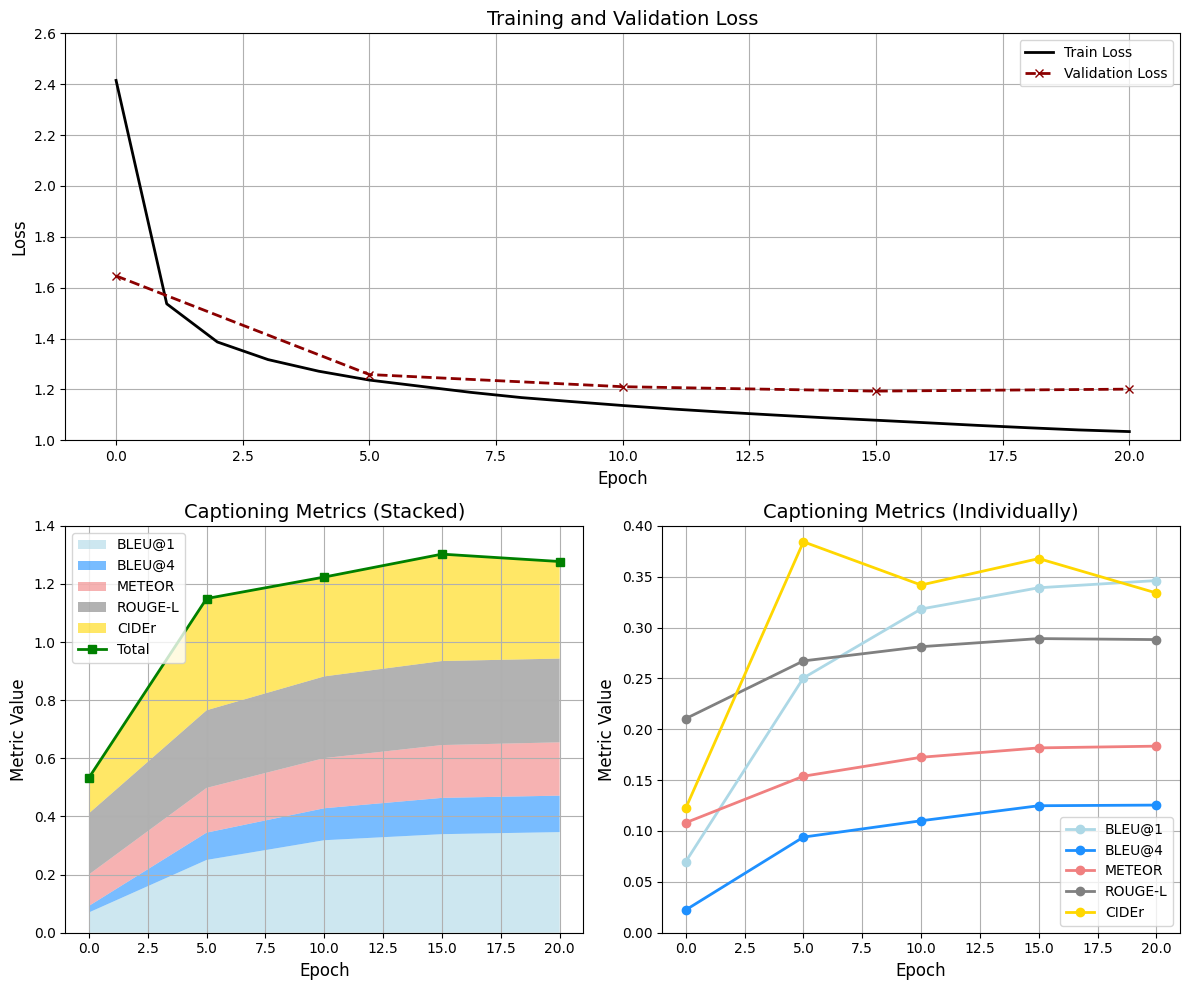

Plots for log file: log_Pretrain_stage2_allinfo_true_query_64_lr_1e-4_stage2_allinfo_true_lr_5e-4_stage2.txt
{'test_loss': '1.249606', 'test_BLEU_1': '0.327002', 'test_BLEU_2': '0.222951', 'test_BLEU_3': '0.164090', 'test_BLEU_4': '0.127372', 'test_METEOR': '0.178337', 'test_ROUGE_L': '0.325656', 'test_CIDEr': '0.291373', 'test_agg_metrics': '1.636780', 'all_info_stage1': 'true', 'num_query_token': '64', 'lr_stage1': '1e-4', 'all_info_stage2': 'true', 'lr_stage2': '5e-4'}
['./data/logs/log', 'Pretrain', 'stage2', 'allinfo', 'true', 'query', '64', 'lr', '1e-4', 'stage2', 'allinfo', 'true', 'lr', '5e-4', 'stage2.txt']


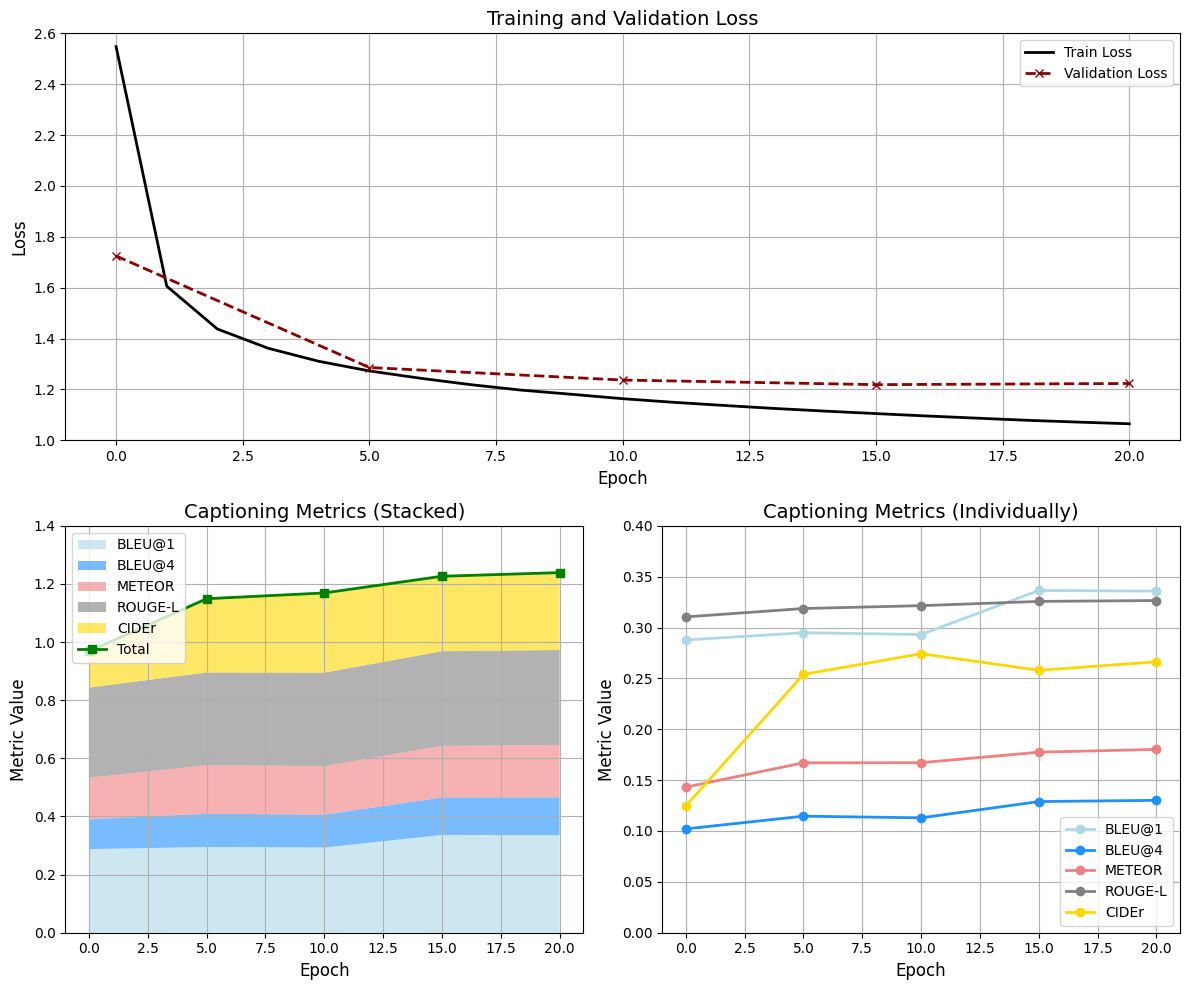

In [14]:
stage2_files = [path + f for f in stage2]

comparison = pd.DataFrame()

for stage2_run in stage2_files:
    stage2_name = stage2_run.split('/')[-1]
    stage2_log = read_log_file(stage2_run)
    run, model, datasets, train_lst, val_lst, test_score = split_log_file_stage2(stage2_log)
    # ['./data/logs/log', 'Pretrain', 'stage2', 'allinfo', 'false', 'query', '16', 'lr', '1e-4', 'stage2', 'allinfo', 'false', 'lr', '5e-4', 'stage2.txt']
    parameters = {"all_info_stage1": stage2_run.split("_")[4],
                  "num_query_token": stage2_run.split("_")[6],
                  "lr_stage1": stage2_run.split("_")[8],
                  "all_info_stage2": stage2_run.split("_")[11],
                  "lr_stage2": stage2_run.split("_")[13].rstrip('.txt')}
    # parameters= {"all_info": stage1_run.split("_")[4],
    # "num_query_token": stage1_run.split("_")[6],
    # "lr" : stage1_run.split("_")[8],
    # if parameters['lr_stage1'] != '1e-4':
    #     continue
    test_score = {**test_score, **parameters}
    if (parameters['all_info_stage1'] == 'true') and (parameters["num_query_token"] == '64'):
        print(f'Plots for log file: {stage2_name}')
        print(test_score)
        print(stage2_run.split("_"))
        plot_training_and_validation_stage2(train_lst, val_lst)

    test_score['new_agg'] = float(test_score['test_BLEU_1']) + float(test_score['test_BLEU_4']) + float(test_score['test_METEOR']) + float(test_score['test_ROUGE_L']) + float(test_score['test_CIDEr'])

    # comparison = pd.concat([comparison, pd.DataFrame(test_score.values(), test_score.keys(), columns=[stage1_run[stage1_run.find('stage1_'):stage1_run.find('_stage1.txt')]]).T])
    comparison = pd.concat([comparison, pd.DataFrame(test_score.values(), test_score.keys(), columns=[stage2_name]).T])

In [30]:
results_df_stage_2 = comparison.groupby(["all_info_stage2", "num_query_token", "all_info_stage1"])[['test_loss', 'test_BLEU_1', 'test_BLEU_4', 'test_METEOR', 'test_ROUGE_L', 'test_CIDEr', 'new_agg']].mean()
loss_columns = ['test_loss', 'test_BLEU_1', 'test_BLEU_4', 'test_METEOR', 
                    'test_ROUGE_L', 'test_CIDEr', 'new_agg']
results_df_stage_2[loss_columns] = results_df_stage_2[loss_columns].astype(float).round(3)

results_df_stage_2 = results_df_stage_2.rename(axis=1, mapper={"test_loss": "Loss", 'test_BLEU_1':"BLEU@1", 'test_BLEU_4':"BLEU@4", 'test_METEOR': "METEOR", 
                    'test_ROUGE_L': "ROUGE", 'test_CIDEr': "CIDEr", 'new_agg': "Total Captioning Loss"})
results_df_stage_2

Loss  BLEU@1  BLEU@4  \
all_info_stage2 num_query_token all_info_stage1                          
false           16              false            1.231   0.346   0.121   
                                true             1.229   0.350   0.122   
                32              false            1.243   0.377   0.131   
                                true             1.245   0.366   0.126   
                64              false            1.231   0.327   0.117   
                                true             1.224   0.339   0.124   
true            16              false            1.263   0.342   0.130   
                                true             1.247   0.301   0.112   
                32              false            1.261   0.354   0.135   
                                true             1.252   0.347   0.133   
                64              false            1.259   0.335   0.131   
                                true             1.250   0.327   0.127   

                                                 METEOR  ROUGE  CIDEr  \
all_info_stage2 num_query_token all_info_stage1                         
false           16              false             0.205  0.282  0.101   
                                true              0.207  0.282  0.095   
                32              false             0.196  0.284  0.139   
                                true              0.196  0.283  0.135   
                64              false             0.175  0.281  0.366   
                                true              0.183  0.288  0.357   
true            16              false             0.172  0.301  0.102   
                                true              0.186  0.293  0.097   
                32              false             0.183  0.318  0.198   
                                true              0.183  0.321  0.229   
                64              false             0.179  0.323  0.262   
                                true              0.178  0.326  0.291   

                                                 Total Captioning Loss  
all_info_stage2 num_query_token all_info_stage1                         
false           16              false                            1.057  
                                true                             1.055  
                32              false                            1.127  
                                true                             1.107  
                64              false                            1.266  
                                true                             1.290  
true            16              false                            1.047  
                                true                             0.990  
                32              false                            1.188  
                                true                             1.213  
                64              false                            1.231  
                                true                             1.250

In [31]:
# --- Generate LaTeX Code ---
latex_table = results_df_stage_2.reset_index().to_latex(
    escape=False,
    caption=("@TODO."),
    label="tab:stage2results",
    column_format='@{}cccccccccc@{}',
    header=True
)
print(latex_table)

\begin{table}
\caption{@TODO.}
\label{tab:stage2results}
\begin{tabular}{@{}cccccccccc@{}}
\toprule
 & all_info_stage2 & num_query_token & all_info_stage1 & Loss & BLEU@1 & BLEU@4 & METEOR & ROUGE & CIDEr & Total Captioning Loss \\
\midrule
0 & false & 16 & false & 1.231000 & 0.346000 & 0.121000 & 0.205000 & 0.282000 & 0.101000 & 1.057000 \\
1 & false & 16 & true & 1.229000 & 0.350000 & 0.122000 & 0.207000 & 0.282000 & 0.095000 & 1.055000 \\
2 & false & 32 & false & 1.243000 & 0.377000 & 0.131000 & 0.196000 & 0.284000 & 0.139000 & 1.127000 \\
3 & false & 32 & true & 1.245000 & 0.366000 & 0.126000 & 0.196000 & 0.283000 & 0.135000 & 1.107000 \\
4 & false & 64 & false & 1.231000 & 0.327000 & 0.117000 & 0.175000 & 0.281000 & 0.366000 & 1.266000 \\
5 & false & 64 & true & 1.224000 & 0.339000 & 0.124000 & 0.183000 & 0.288000 & 0.357000 & 1.290000 \\
6 & true & 16 & false & 1.263000 & 0.342000 & 0.130000 & 0.172000 & 0.301000 & 0.102000 & 1.047000 \\
7 & true & 16 & true & 1.247000 & 0.301000

In [ ]:
from docx.api import Document

with open(r"", "rb") as docx_file:
    doc = Document(docx_file)

In [33]:
t_number_list = []
for paragraph in doc.paragraphs[63:]:
    if "Text" in paragraph.text:
        t_number = paragraph.text
        t_number_list.append(t_number)

In [34]:
import pandas as pd

total_scores = pd.DataFrame()

for table, t_number in zip(doc.tables[2:], t_number_list):
    df = pd.DataFrame([[cell.text for cell in row.cells] for row in table.rows])

    df = df.T
    df.columns = df.iloc[0].str.replace('\n', '')
    df.drop(0, inplace=True)
    df['Omissions of Information'] = [df.iloc[3, 1:].str.replace('\n', '').values.tolist()]*len(df)
    df.drop([2,3,4], inplace=True)
    df.replace('', 0, inplace=True)
    df.drop(columns=['FE+R(Use counters above)', 'H+R (Use counters above)'], inplace=True)
    df.index = [t_number]
    df = df.iloc[:, 1:]
    df['specimen'] = t_number.split(" ")[2][1:-1]
    total_scores = pd.concat([total_scores, df])

In [35]:
with open("./data/experiment/experiment.xlsx", "rb") as experiment_file:
    experiment = pd.read_excel(experiment_file)

experiment_melted = experiment.melt(id_vars='Medical Reports', value_vars=['Ground Truth','BioGPT','BioGPT-Large','BioGPT - ALL'])
experiment_melted['Medical Reports'] = 'Text ' + experiment_melted['value'].astype(str) + " (" + experiment_melted['Medical Reports'] + ")"
experiment_melted.rename(columns={'variable':'Model'}, inplace=True)
experiment_melted.drop(columns='value', inplace=True)

In [36]:
total_df = pd.merge(experiment_melted, total_scores, left_on='Medical Reports', right_on=total_scores.index, how='left')

In [37]:
total_df['Factual errors (FE)'] = total_df['Factual errors (FE)'].astype(int)
total_df['Hallucinations (H)'] = total_df['Hallucinations (H)'].astype(int)
total_df['Repetitions (R)'] = total_df['Repetitions (R)'].astype(int)
total_df['Grade'] = total_df['Grade'].astype(int)

In [ ]:
import re
 
def transform_case_id(string):
    """
    """
    # Regular expression to match the last number and any characters following it
    match = re.search(r'(\d+)([A-Z0-9&,\s]+)$', string)
   
    if match:
        number_part = match.group(1)  # Number part
        letter_part = match.group(2)  # Optional letter part
        rest_of_string = string[:match.start(1)]  # Part of the string before the match
        return rest_of_string + number_part, letter_part
   
    return string, ''  # Return the entire string and empty if no match


In [ ]:
with open("", "rb") as patient_file:
    patient = pd.read_excel(patient_file)
patient['specimen'] = patient['specimen'].apply(lambda x: "_".join(transform_case_id(x)))

In [40]:
total_df = pd.merge(total_df, patient[['specimen', 'label']], left_on='specimen', right_on='specimen', how='left')

In [41]:
total_df['N_Omissions'] = total_df['Omissions of Information'].apply(lambda x: len([y for y in x if y != ""]))

In [ ]:
cols = list(total_df.columns)
cols = cols[:7] + [cols[-1]] + cols[7:-1]
total_df = total_df[cols]

In [44]:
# I want to sort the values of total_df based on a different dataframes values current order: experiment['Medical Reports']
total_df = total_df.set_index('specimen').sort_values('Medical Reports').loc[experiment['Medical Reports']].reset_index()

In [ ]:
# index specimen, column model, values grade, but additional column for "label"
pivot_df =  total_df.pivot(index='specimen', columns='Model', values=['Grade', 'label'])

In [71]:
pivot_df['year'] = pivot_df.index.str[1:3].astype(int)
pivot_df['labelinho'] = pivot_df['label']['BioGPT']
pivot_df['year'] = pivot_df['year'].apply(lambda x: 0 if x < 16 else 1)
pivot_df.groupby(['year', 'labelinho'])['Grade'].mean()

Grade                                       
Model             BioGPT BioGPT - ALL BioGPT-Large Ground Truth
year labelinho                                                 
0    False          4.25          3.5          4.0         4.25
     True       1.571429     1.428571     1.714286     3.142857
1    False      3.470588          3.0     3.470588     4.235294
     True            2.0     1.777778     2.111111     3.833333

In [47]:
# Export as excel
total_df.set_index('specimen').to_excel("./data/experiment/experiment_scores.xlsx")

In [48]:
total_df.groupby(["Model"])[['Factual errors (FE)', 'Hallucinations (H)', 'Repetitions (R)', 'Grade', 'N_Omissions']].mean().reset_index()

,Model,Factual errors (FE),Hallucinations (H),Repetitions (R),Grade,N_Omissions
0,BioGPT,1.70,0.00,0.10,2.80,0.62
1,BioGPT - ALL,1.94,3.04,0.76,2.42,0.28
2,BioGPT-Large,1.74,0.00,0.08,2.82,0.48
3,Ground Truth,0.70,0.06,0.80,3.94,0.20


In [49]:
total_df.groupby(["Model"])[['Factual errors (FE)', 'Hallucinations (H)', 'Repetitions (R)', 'Grade', 'N_Omissions']].std().reset_index()

,Model,Factual errors (FE),Hallucinations (H),Repetitions (R),Grade,N_Omissions
0,BioGPT,1.681229,0.000000,0.462910,1.442786,1.140891
1,BioGPT - ALL,1.822871,4.840138,2.114672,1.230397,0.453557
2,BioGPT-Large,1.626440,0.000000,0.340468,1.320019,0.677330
3,Ground Truth,1.035098,0.239898,1.772811,0.977502,0.451754


In [50]:
total_df.groupby(["label", "Model"])[['Factual errors (FE)', 'Hallucinations (H)', 'Repetitions (R)', 'Grade', 'N_Omissions']].mean().reset_index()

## hallucinations in ground truth --> NaN
## refer to common and non-common nevi, instead of low-, high-complexity

,label,Model,Factual errors (FE),Hallucinations (H),Repetitions (R),Grade,N_Omissions
0,False,BioGPT,0.92,0.00,0.08,3.72,0.28
1,False,BioGPT - ALL,1.04,1.16,0.00,3.16,0.28
2,False,BioGPT-Large,0.88,0.00,0.04,3.64,0.40
3,False,Ground Truth,0.48,0.04,0.12,4.24,0.20
4,True,BioGPT,2.48,0.00,0.12,1.88,0.96
5,True,BioGPT - ALL,2.84,4.92,1.52,1.68,0.28
6,True,BioGPT-Large,2.60,0.00,0.12,2.00,0.56
7,True,Ground Truth,0.92,0.08,1.48,3.64,0.20


In [51]:
total_df.groupby(["label", "Model"])[['Factual errors (FE)', 'Hallucinations (H)', 'Repetitions (R)', 'Grade', 'N_Omissions']].std().reset_index()

,label,Model,Factual errors (FE),Hallucinations (H),Repetitions (R),Grade,N_Omissions
0,False,BioGPT,0.909212,0.000000,0.276887,1.242310,0.541603
1,False,BioGPT - ALL,0.978093,0.374166,0.000000,1.178983,0.458258
2,False,BioGPT-Large,1.053565,0.000000,0.200000,1.220656,0.645497
3,False,Ground Truth,0.714143,0.200000,0.331662,0.925563,0.500000
4,True,BioGPT,1.917464,0.000000,0.600000,0.971253,1.457166
5,True,BioGPT - ALL,2.034699,6.350328,2.815434,0.748331,0.458258
6,True,BioGPT-Large,1.658312,0.000000,0.439697,0.816497,0.711805
7,True,Ground Truth,1.255654,0.276887,2.311565,0.952190,0.408248


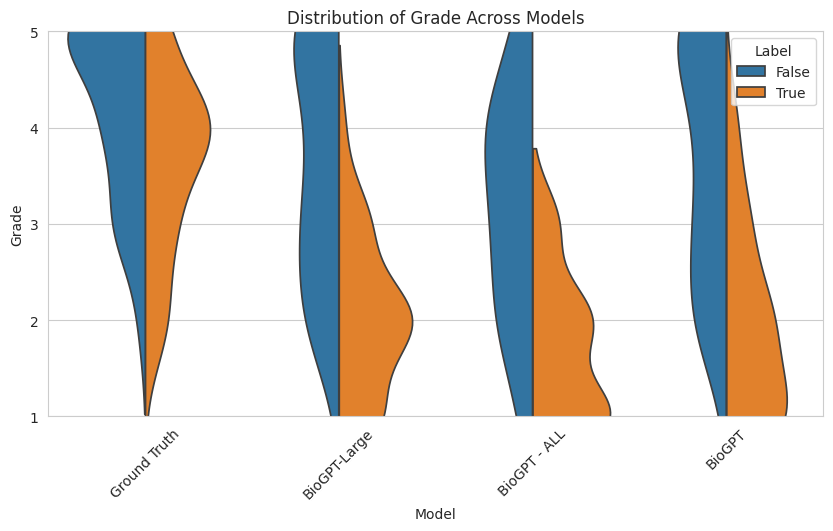

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics for visualization
metrics = ['Grade']

# Set the style for better readability
sns.set_style("whitegrid")

# Create violin plots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    
    sns.violinplot(data=total_df, x="Model", y=metric, hue="label", split=True, inner=None)
    
    plt.title(f'Distribution of {metric} Across Models')
    plt.xlabel("Model")
    plt.ylim(1,5)
    # only show integer values on y-axis
    plt.yticks(range(1, 6))

    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title="Label")
    
    plt.show()
